In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Vowel.txt")
df.y = df.y - 1
features = [f'x.{i+1}' for i in range(10)]
df_train, df_test = df[df.is_train==1], df[df.is_train==0]
X_train, y_train = df_train[features].values, df_train.y.values
X_test, y_test = df_test[features].values, df_test.y.values

In [3]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
priors = counts_elements/y_train.shape[0]
priors

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

In [4]:
means = [np.mean(X_train[y_train == i], axis=0) for i in range(11)]
means

[array([-3.3595625 ,  0.0629375 , -0.2940625 ,  1.20333333,  0.38747917,
         1.22189583,  0.096375  ,  0.03710417, -0.62435417, -0.161625  ]),
 array([-2.708875  ,  0.49060417, -0.58022917,  0.8135    ,  0.2019375 ,
         1.06347917, -0.19091667,  0.3738125 , -0.51595833,  0.08060417]),
 array([-2.44025   ,  0.774875  , -0.79839583,  0.80866667,  0.04245833,
         0.56925   , -0.2800625 ,  0.20495833, -0.47827083,  0.181875  ]),
 array([-2.22660417,  1.52583333, -0.8744375 ,  0.42214583, -0.3713125 ,
         0.24835417, -0.01895833,  0.10714583, -0.32627083, -0.05375   ]),
 array([-2.7563125 ,  2.27595833, -0.46572917,  0.2253125 , -1.03679167,
         0.38979167,  0.23641667,  0.424625  , -0.20070833, -0.28070833]),
 array([-2.67354167,  1.75877083, -0.4745625 ,  0.3505625 , -0.66585417,
         0.417     ,  0.16233333,  0.22925   , -0.2075    ,  0.05270833]),
 array([-3.24372917,  2.46835417, -0.1050625 ,  0.39645833, -0.98029167,
         0.1623125 ,  0.01958333,  0.76

In [5]:
W = np.zeros((10, 10))
for k in range(11):
    X_train_k = X_train[y_train == k]
    cov = np.cov(X_train_k.T, bias=1)
    W += priors[k] * cov
W

array([[ 0.44432172, -0.20332612, -0.18542255, -0.00624557, -0.1359137 ,
         0.17001934,  0.0175946 ,  0.2083341 ,  0.08267217, -0.09475217],
       [-0.20332612,  0.45959169, -0.0475354 , -0.17020968,  0.06049936,
        -0.11013713,  0.05577997, -0.07162576, -0.12595893, -0.03929687],
       [-0.18542255, -0.0475354 ,  0.49616661,  0.08444751,  0.03245867,
        -0.25296138, -0.1183088 , -0.09353829,  0.05539872,  0.14214086],
       [-0.00624557, -0.17020968,  0.08444751,  0.5128403 , -0.1534732 ,
        -0.00505278, -0.18888578,  0.0147492 ,  0.17480164,  0.07401574],
       [-0.1359137 ,  0.06049936,  0.03245867, -0.1534732 ,  0.28950027,
        -0.07892699,  0.03689652, -0.12892739, -0.15707035,  0.00961092],
       [ 0.17001934, -0.11013713, -0.25296138, -0.00505278, -0.07892699,
         0.30933439,  0.02284092,  0.11925525, -0.00560813, -0.10555425],
       [ 0.0175946 ,  0.05577997, -0.1183088 , -0.18888578,  0.03689652,
         0.02284092,  0.20758972, -0.02260436

In [6]:
M = np.vstack(means)

In [7]:
d, U = np.linalg.eig(W)
D = np.diag(d)

In [8]:
W_sqrt_inv = np.linalg.inv(U @ np.diag(np.sqrt(d)) @ U.T)

In [9]:
M_star = M @ W_sqrt_inv

In [10]:
M_star_mu = np.mean(M_star, axis=0)
B_star = np.zeros((10, 10))
for k in range(11):
    d = (M_star[k] - M_star_mu).reshape((10, 1))
    B_star += (d @ d.T) / 11

In [11]:
d_b_star, V = np.linalg.eig(B_star)

In [12]:
v0_star = V[:,0].reshape((10, 1))
v1_star = V[:,1].reshape((10, 1))
# don't understand inverse
v0 = -W_sqrt_inv @ v0_star
v1 = -W_sqrt_inv @ v1_star

In [13]:
Z0 = v0.T @ X_train.T
Z1 = v1.T @ X_train.T

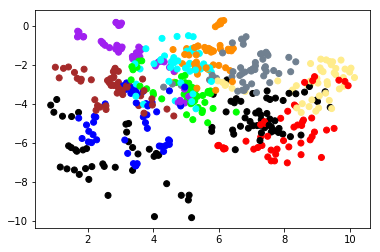

In [14]:
colors = np.array(['#000000', '#0000FF', '#A52A2A', '#A020F0', '#FF8C00', '#00FFFF',
                   '#708090', '#FFEC8B', '#000000', '#FF0000', '#00FF00'])
plt.scatter(Z0, Z1, c=colors[y_train])

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import sympy as sp

In [16]:
Y = OneHotEncoder(categories='auto').fit(np.atleast_2d(y_train).T).transform(np.atleast_2d(y_train).T).toarray()

In [17]:
#X_train.shape
#X = np.c_[np.ones(528), X_train]
X = StandardScaler(with_std=False).fit_transform(X_train)

In [18]:
Px = X @ np.linalg.inv(X.T @ X) @ X.T
# are not ordered
d, U = np.linalg.eig(Y.T @ Px @ Y)
O = U[:, :2]
O /= np.sqrt(np.diagonal(O.T @ np.diag(priors) @ O))
B = np.linalg.lstsq(X, Y)[0]
B = B @ O

C:\Python64\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


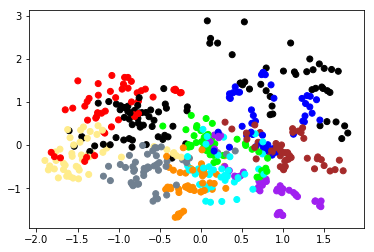

In [19]:
R = B.T @ X.T
plt.scatter(R[0], R[1], c=colors[y_train])

In [29]:
O = np.eye(11)
O /= np.sqrt(np.diagonal(O.T @ np.diag(priors) @ O))
O_star = Y @ O

In [33]:
Xs = [sp.Symbol(f'X{i}') for i in range(10)]
max_degree = 2
knots = [np.unique(X[:, i]) for i in range(X.shape[1])]
X_exp = np.ones(shape=(X.shape[0], 1))
degrees = [0]
basis_functions = [1]

for e in range(6):
    best_error, best_fnc1, best_fnc2, degree = np.inf, None, None, None
    s1, s2 = None, None
    for i in range(X.shape[1]):
        Xi = X[:, i]
        for knot in knots[i]:
            if knot == knots[i][0] or knot == knots[i][-1]:
                continue
            fnc1 = np.maximum(0, Xi - knot)
            fnc2 = np.maximum(0, knot - Xi)
            for j in range(X_exp.shape[1]):
                if degrees[j] == max_degree:
                    continue
                fnc1_ = fnc1 * X_exp[:, j]
                fnc2_ = fnc2 * X_exp[:, j]
                
                X_exp_ = np.c_[X_exp, fnc1_, fnc2_]
                #B = np.linalg.lstsq(X_exp_, O_star, rcond=None)[0]
                Sl = X_exp_ @ np.linalg.inv(X_exp_.T @ X_exp_) @ X_exp_.T
                #error = mean_squared_error(O_star, X_exp_@B)
                error = mean_squared_error(O_star, Sl @ O_star)
                if error < best_error:
                    best_error, best_fnc1, best_fnc2 = error, fnc1_, fnc2_
                    degree = degrees[j] + 1
                    s1 = basis_functions[j]*sp.Max(0, Xs[i]-knot)
                    s2 = basis_functions[j]*sp.Max(0, knot-Xs[i])                    
    X_exp = np.c_[X_exp, best_fnc1, best_fnc2]
    degrees += [degree] * 2
    basis_functions += [s1, s2]
    print(best_error, s1, s2)

0.8010816898448674 Max(0, X1 + 0.850342803030303) Max(0, -X1 - 0.850342803030303)


LinAlgError: Singular matrix

In [28]:
#B = np.linalg.lstsq(X_exp, O_star, rcond=None)[0]
#mean_squared_error(O_star, X_exp @ B)
#Sl = X_exp @ np.linalg.inv(X_exp.T @ X_exp) @ X_exp.T
#mean_squared_error(O_star, Sl @ O_star)

0.04795808139647577

In [22]:
Sl = X_exp @ np.linalg.inv(X_exp.T @ X_exp) @ X_exp.T
O_star_hat = Sl @ O_star
B = np.linalg.lstsq(X_exp, O_star, rcond=None)[0]
n = X_exp @ B
d, U = np.linalg.eig(O_star.T @ Sl @ O_star)
d_ord = d[np.argsort(d)[::-1]]
U = U[:, np.argsort(d)[::-1]]

C:\Python64\lib\site-packages\numpy\core\numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


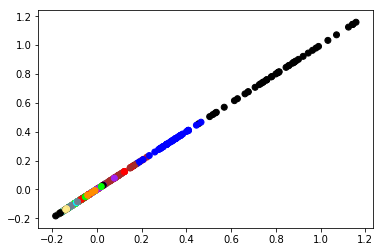

In [23]:
R = U.T @ n.T
plt.scatter(R[0], R[1], c=colors[y_train])

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
_x_train = R[0:6].T
lda = LinearDiscriminantAnalysis().fit(_x_train, y_train)
lda_train_error = 1 - accuracy_score(y_train, lda.predict(_x_train))
lda_train_error

ValueError: Complex data not supported
[[ 0.4555435 -0.06336394j  0.4555435 +0.06336394j -0.21468992+0.15475636j
  -0.21468992-0.15475636j  0.10313977+0.j         -0.07080012+0.j        ]
 [ 0.37448898-0.07609451j  0.37448898+0.07609451j -0.09708185+0.16789411j
  -0.09708185-0.16789411j -0.05317853+0.j         -0.08684213+0.j        ]
 [ 0.09658341-0.08867463j  0.09658341+0.08867463j  0.15210336+0.04524611j
   0.15210336-0.04524611j -0.20447166+0.j          0.25489241+0.j        ]
 ...
 [ 0.02902985-0.05759954j  0.02902985+0.05759954j -0.16584829+0.16865094j
  -0.16584829-0.16865094j  0.09230881+0.j         -0.22749663+0.j        ]
 [ 0.12240653-0.09681954j  0.12240653+0.09681954j -0.11575422+0.34816496j
  -0.11575422-0.34816496j  0.39025728+0.j         -0.48033783+0.j        ]
 [ 0.0199458 -0.0788214j   0.0199458 +0.0788214j   0.02485839+0.14781894j
   0.02485839-0.14781894j -0.07679701+0.j         -0.24456361+0.j        ]]


In [48]:
result = []
for j in range(X_test.shape[0]):
    sb = {Xs[i]: X_test[j][i] for i in range(10)}
    result.append([1]+[basis_functions[i+1].evalf(subs=sb) for i in range(len(basis_functions)-1)])

In [70]:
t = np.array(np.vstack(result), dtype=float)
R = U.T @ (t @ B).T
#plt.scatter(R[0], R[1], c=colors[y_test])
_x_test = R[0:6].T
lda_test_error = 1 - accuracy_score(y_test, lda.predict(_x_test))
lda_test_error

0.8484848484848485